# Entrenamiento con datos de entrenamiento
<hr>

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import pandas as pd

In [23]:
X = pd.read_csv("../Reduccion_descriptores/Prueba_hipotesis/EGFR_h.csv")

In [24]:
X.shape

(7408, 61)

In [25]:
X.fillna(method='ffill', inplace=True)


C:\Users\Eliud\AppData\Local\Temp\ipykernel_22484\419284443.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


In [26]:
df = pd.read_csv("../Reduccion_descriptores/Datos_con_1000/EGFR_1000.csv")

In [27]:
y = df["Inhibidor"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
pipe = Pipeline([
    ('RF', RandomForestClassifier())
])

In [30]:
param_grid = {
    'RF__max_depth': [10, 20, 30, 40, 50],
    'RF__bootstrap': [True, False],
    'RF__max_features': ['sqrt', "log2"]
}

In [31]:
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

In [32]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=sqrt; total time=   1.3s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=sqrt; total time=   1.2s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=sqrt; total time=   1.2s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=sqrt; total time=   1.2s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=sqrt; total time=   1.2s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=log2; total time=   0.9s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=log2; total time=   0.9s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=log2; total time=   0.9s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=log2; total time=   1.0s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=log2; total time=   1.0s
[CV] END RF__bootstrap=True, RF__max_depth=20, R

GridSearchCV(cv=5, estimator=Pipeline(steps=[('RF', RandomForestClassifier())]),
             param_grid={'RF__bootstrap': [True, False],
                         'RF__max_depth': [10, 20, 30, 40, 50],
                         'RF__max_features': ['sqrt', 'log2']},
             scoring='accuracy', verbose=2)

# Selección del mejor modelo
<hr>

In [33]:
best_model = grid_search.best_estimator_

# Resultados del modelo
<hr>

In [34]:
y_predicha = best_model.predict(X_test)

In [35]:
#Calcular estadísticos
accuracy = accuracy_score(y_test, y_predicha)
recall = recall_score(y_test, y_predicha, average='weighted')
precision = precision_score(y_test, y_predicha, average='weighted')
f1 = f1_score(y_test, y_predicha, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.855
Recall 0.855
precision 0.853
f1 0.853


In [36]:
y_entrenamiento = best_model.predict(X_train)

In [37]:
accuracy = accuracy_score(y_train, y_entrenamiento)
recall = recall_score(y_train, y_entrenamiento, average='weighted')
precision = precision_score(y_entrenamiento, y_entrenamiento, average='weighted')
f1 = f1_score(y_train, y_entrenamiento, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.999
Recall 0.999
precision 1.0
f1 0.999


# Confusion Matrix
<hr>

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [39]:
mat = confusion_matrix(y_predicha, y_test)

<Axes: >

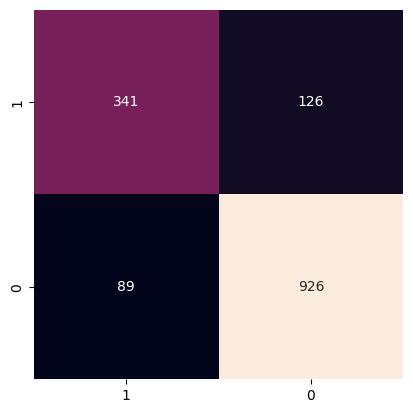

In [40]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar = False, xticklabels=df["Inhibidor"].value_counts().index, yticklabels=df["Inhibidor"].value_counts().index)

# Guardar modelo
<hr>

In [41]:
import joblib

In [42]:
joblib.dump(pipe, '../GuardadoDeModelos/EGFR_MD/modelo_RF.joblib')

['../GuardadoDeModelos/EGFR_MD/modelo_RF.joblib']